In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("abhishek14398/salary-dataset-simple-linear-regression")

print("Path to dataset files:", path)

C:\Users\DELL\AppData\Roaming\Python\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 457/457 [00:00<?, ?B/s] 

Extracting files...
Path to dataset files: C:\Users\DELL\.cache\kagglehub\datasets\abhishek14398\salary-dataset-simple-linear-regression\versions\1


In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
df=pd.read_csv("Salary_dataset.csv")
df

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0
5,5,3.0,56643.0
6,6,3.1,60151.0
7,7,3.3,54446.0
8,8,3.3,64446.0
9,9,3.8,57190.0


In [4]:
df.columns

Index(['Unnamed: 0', 'YearsExperience', 'Salary'], dtype='object')

In [8]:
df.drop(columns='Unnamed: 0',inplace=True)

In [10]:
df.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

In [12]:
df.duplicated().sum()

0

In [13]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.413333,76004.000000
std,2.837888,27414.429785
min,1.200000,37732.000000
25%,3.300000,56721.750000
50%,4.800000,65238.000000
75%,7.800000,100545.750000
max,10.600000,122392.000000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [15]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


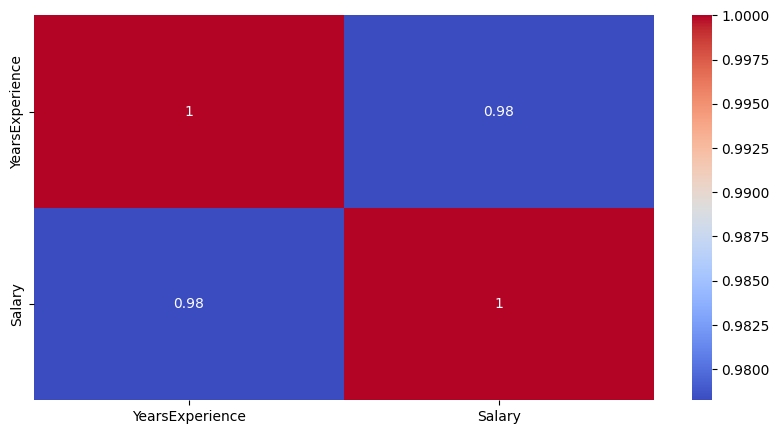

In [16]:
crr=df.corr()
plt.figure(figsize=(10,5))
sns.heatmap(crr,annot=True,cmap='coolwarm')
plt.show()

In [17]:
X=df[['YearsExperience']]
Y=df[['Salary']]


In [20]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)


X_train shape: (24, 1)
X_test shape: (6, 1)
Y_train shape: (24, 1)
Y_test shape: (6, 1)


In [21]:
model=LinearRegression()
model.fit(X_train,Y_train)
Y_pred=model.predict(X_test)
print(Y_pred)

[[115791.21011287]
 [ 71499.27809463]
 [102597.86866063]
 [ 75268.80422384]
 [ 55478.79204548]
 [ 60190.69970699]]


In [ ]:
print("Predicted values:",Y_pred.flatten())
print("Actual values ",Y_test.values.flatten()) # model is not perfect

Predicted values: [115791.21011287  71499.27809463 102597.86866063  75268.80422384
  55478.79204548  60190.69970699]
Actual values  [112636.  67939. 113813.  83089.  64446.  57190.]


In [29]:
mse=mean_squared_error(Y_test,Y_pred)
print("Mean square error :",mse)

Mean square error : 49830096.855908334


In [30]:
r2=r2_score(Y_test,Y_pred)
print("R2 score :",r2)

R2 score : 0.9024461774180498


In [31]:
model.coef_

array([[9423.81532303]])

In [32]:
model.intercept_

array([24380.20147947])

In [33]:
slope=model.coef_[0][0]
intercept=model.intercept_[0]
print(slope)
print(intercept)

9423.81532303098
24380.20147947369


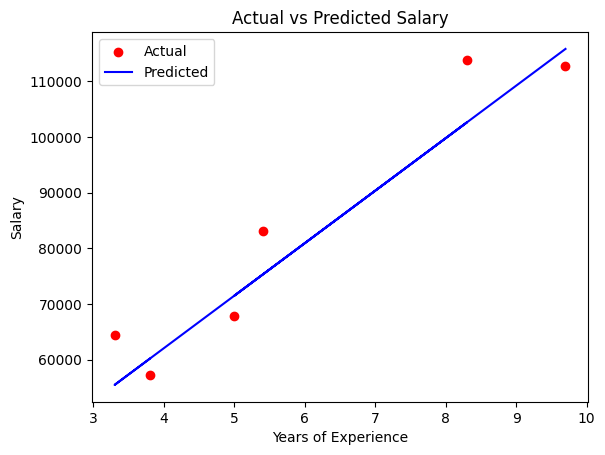

In [34]:
y=slope*X_test+intercept
plt.scatter(X_test,Y_test,color='red',label='Actual')
plt.plot(X_test,y,color='blue',label='Predicted')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Actual vs Predicted Salary')
plt.legend()
plt.show()